Mini Project 1

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

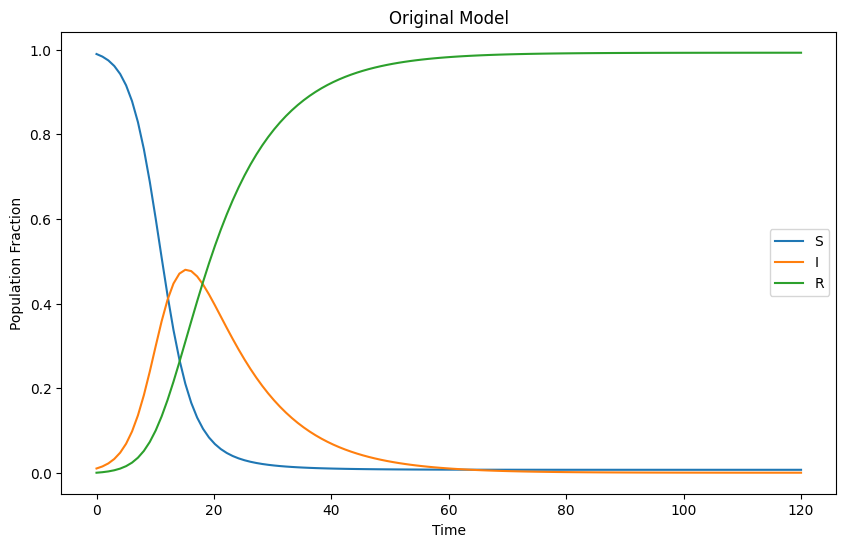

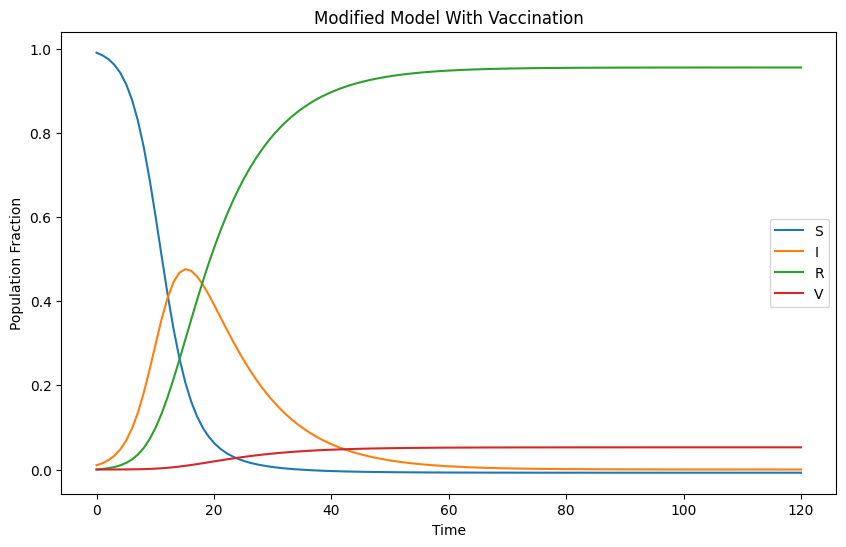

In [ ]:
# Defining models
def original_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


def vac_model(y, t, beta, gamma, epsilon):
    S, I, R, V = y
    vac_rate = epsilon * I * R / (I + R)
    dSdt1 = -beta * S * I - vac_rate
    dIdt1 = beta * S * I - gamma * I
    dRdt1 = gamma * I
    dVdt1 = vac_rate
    return [dSdt1, dIdt1, dRdt1, dVdt1]

# Simulation
def simulate(model, params, y0, t):
    return odeint(model, y0, t, args=params)

# Generate plots
def plotResults(t, results, labels, title):
    plt.figure(figsize=(10, 6))
    for result, label in zip(results, labels):
        plt.plot(t, result, label=label)
    plt.xlabel('Time')
    plt.ylabel('Population Fraction')
    plt.title(title)
    plt.legend()
    plt.show()

# Parameters and initial conditions
t = np.linspace(0, 120, 120)
params_o = (0.5, 1/10)
params_m = (0.5, 1/10, 0.01)
y0_original = [0.99, 0.01, 0]
y0_modified = [0.99, 0.01, 0, 0]

# Simulate
results_original = simulate(original_model, params_o, y0_original, t)
results_modified = simulate(vac_model, params_m, y0_modified, t)

# Plot results
plotResults(t, results_original.T, ['S', 'I', 'R'], 'Original Model')
plotResults(t, results_modified.T, ['S', 'I', 'R', 'V'], 'Modified Model With Vaccination')


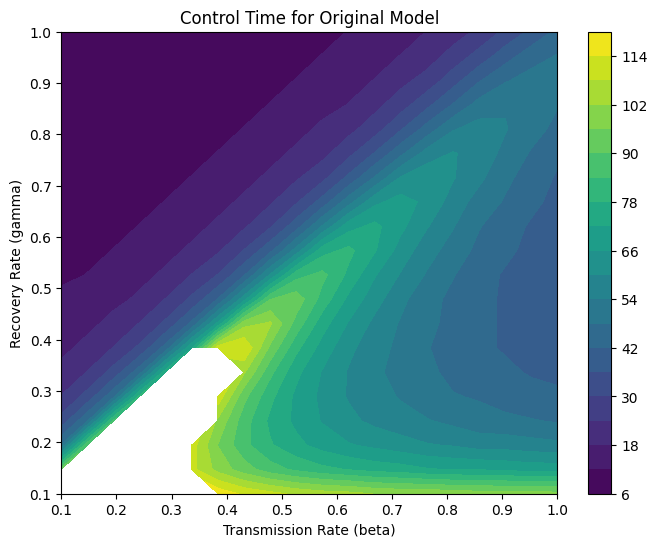

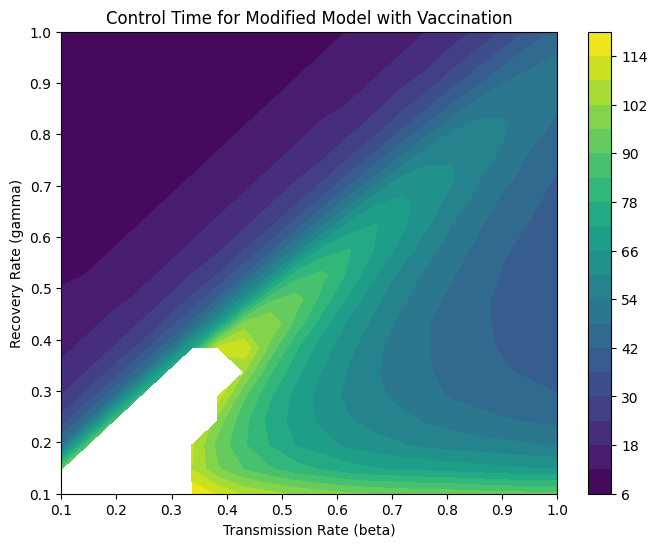

In [ ]:


def computeControlTime(model, y0, t, params):
    res = odeint(model, y0, t, args=params)
    I = res[:, 1]
    control = 0.0001
    below = np.where(I < control)[0]
    if below.size > 0:
        return t[below[0]]
    return np.inf

def generateControlTimes(model, y0, brange, grange, epsilon=None):
    b, g = np.meshgrid(brange, grange)
    Control_Times = np.zeros_like(Beta)

    for i in range(len(brange)):
        for j in range(len(grange)):
            if epsilon is not None:
                params = (b[i, j], g[i, j], epsilon)
            else:
                params = (b[i, j], g[i, j])
            Control_Times[i, j] = computeControlTime(model, y0, t, params)

    return b, g, Control_Times

# Plotting function
def plotControlTimes(Beta, Gamma, Control_Times, title):
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(Beta, Gamma, Control_Times, levels=20, cmap='viridis')
    plt.colorbar(contour)
    plt.xlabel('Transmission Rate (beta)')
    plt.ylabel('Recovery Rate (gamma)')
    plt.title(title)
    plt.show()

# Parameters and ranges
brange = np.linspace(0.1, 1.0, 20)
grange = np.linspace(0.1, 1.0, 20)
epsilon = 0.01  # For the modified model

# Computing control times
Beta, Gamma, Control_Times_Original = generateControlTimes(original_model, y0_original, brange, grange)
plotControlTimes(Beta, Gamma, Control_Times_Original, 'Control Time for Original Model')

Beta, Gamma, Control_Times_Modified = generateControlTimes(vac_model, y0_modified, brange, grange, epsilon)
plotControlTimes(Beta, Gamma, Control_Times_Modified, 'Control Time for Modified Model with Vaccination')


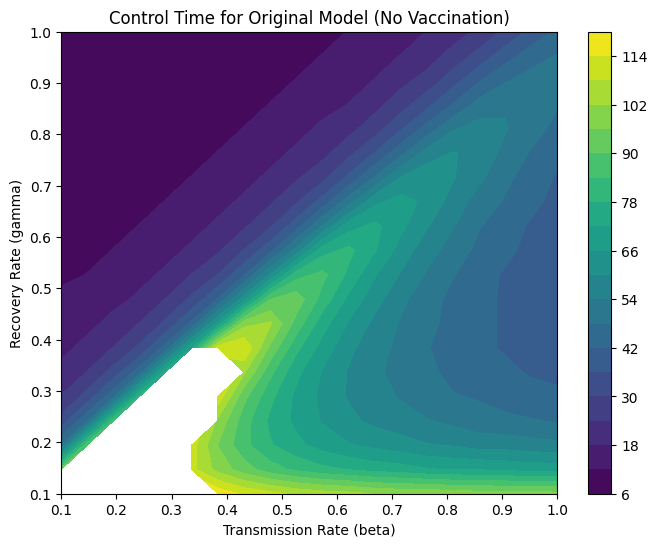

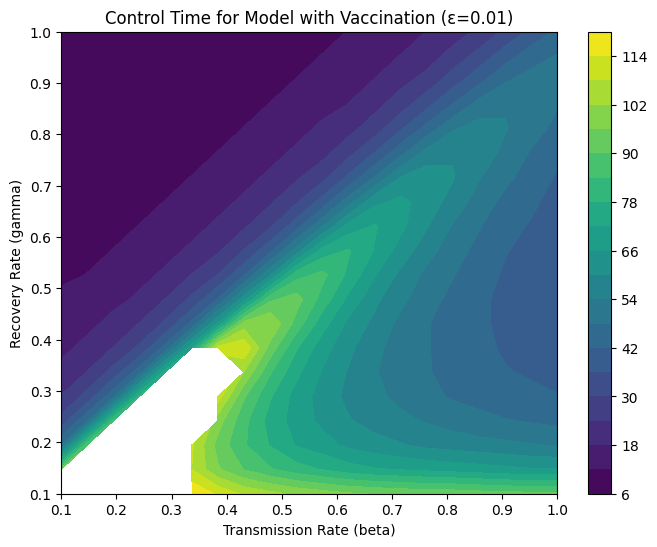

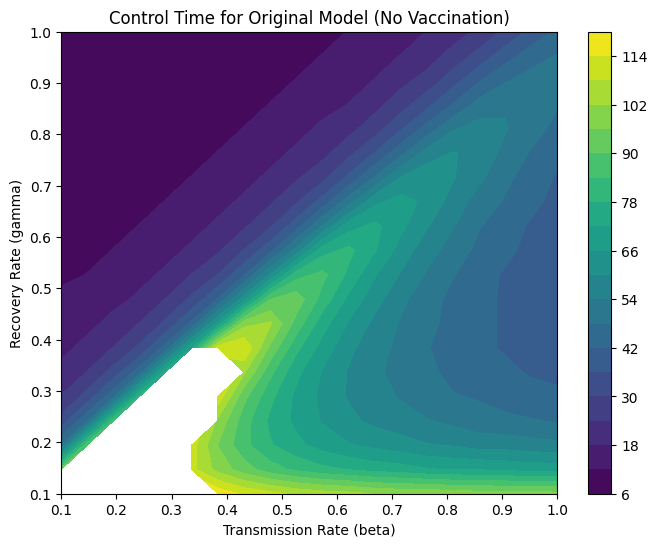

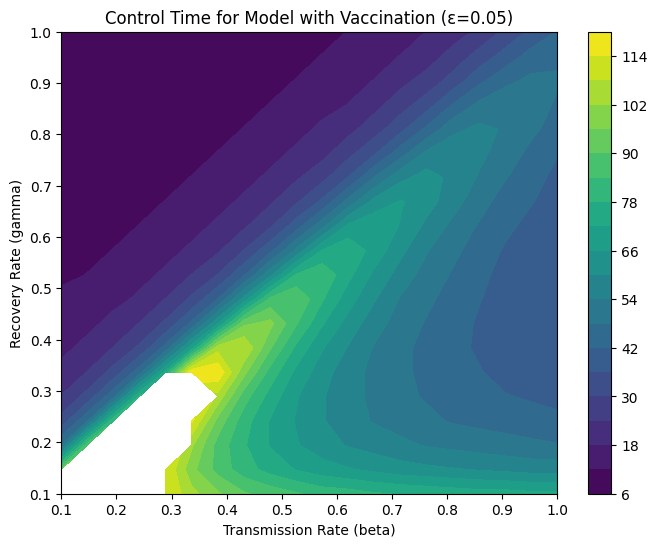

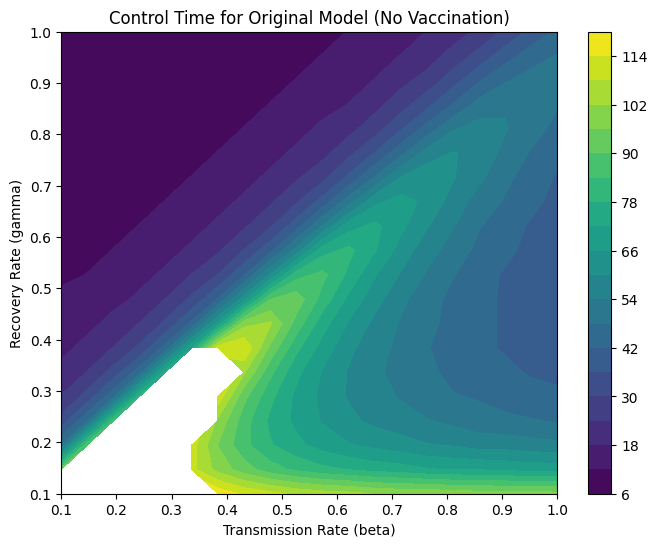

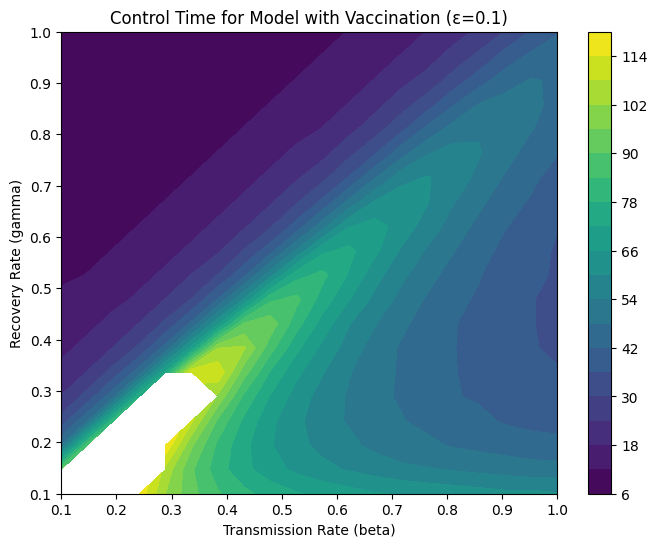

In [ ]:
# Parameters
brange = np.linspace(0.1, 1.0, 20)
grange = np.linspace(0.1, 1.0, 20)
epsilon_values = [0.01, 0.05, 0.1]

# Function for plotting control times
def analyzeVaccinationEffects(brange, grange, epsilon_values, y0_no_vac, y0_vac):
    for epsilon in epsilon_values:
        # Control times without vaccination
        Beta, Gamma, Control_Times_No_Vac = generateControlTimes(original_model, y0_no_vac, brange, grange)
        plotControlTimes(Beta, Gamma, Control_Times_No_Vac, f'Control Time for Original Model (No Vaccination)')

        # Control times with vaccination
        Beta, Gamma, Control_Times_Vac = generateControlTimes(vac_model, y0_vac, brange, grange, epsilon)
        plotControlTimes(Beta, Gamma, Control_Times_Vac, f'Control Time for Model with Vaccination (ε={epsilon})')

# Run the analysis
analyzeVaccinationEffects(brange, grange, epsilon_values, y0_original, y0_modified)